In [60]:
import numpy as np
from scipy import stats
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

Первый интеграл лучше посчитать сразу через cumsum, но пока не очень понятно, как

In [68]:
def fbm(b, N, H):
    '''
N - длина сигнала, H - параметр Хёрста, b - число точек, по которым оценивается первый интеграл. 
Чем больше b, тем точнее оценка
    '''
    eps = 1e-3 #Малый сдвиг, чтобы предотвратить возведение нуля в отрицательную степень
    dB1 = np.random.normal(size=b+1) #Разности для первого интеграла
    dB2 = np.random.normal(size=N+1) #Разности для второго интеграла
    G = 1 / scipy.special.gamma(H + 1/2) # Множитель перед интегралами
    k1 = np.arange(-b-1, 0, 1)
    H12 = H - 1 / 2
    #k2 = np.arange(0, N + 1, 1)
    #n = np.arange(0, N+1, 1)
    #int2 = np.cumsum((n - k2 + eps)**H12 * dB2)
    # Функция, вычисляющая значение в точке
    def get_Bn(n):
        k2 = np.arange(0, n+1, 1)
        int1 = np.sum(((n - k1)**H12 - (-k1)**H12) * dB1) #Первый интеграл
        int2 = np.sum((n - k2 + eps)**H12 * dB2[:n+1]) #Второй интеграл
        return G * (int1 + int2)
    X = np.zeros(N + 1)
    for i in range(1, N+1):
        X[i] = get_Bn(i)
    return X

100%|████████████████████████████████████████████| 5/5 [00:23<00:00,  4.63s/it]


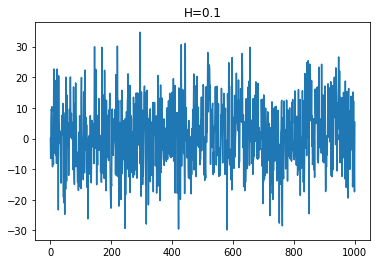

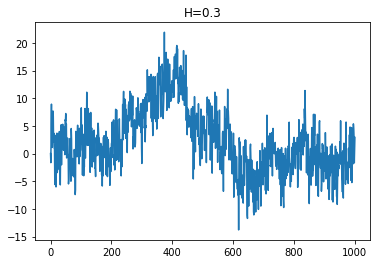

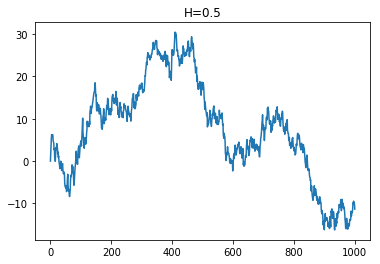

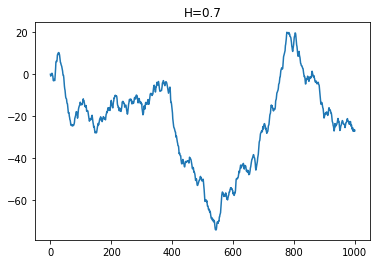

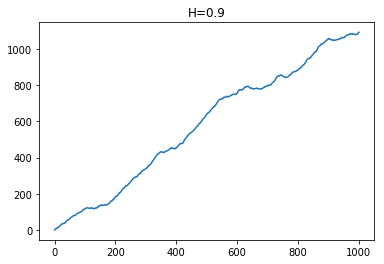

In [69]:
N = 1000
b = int(N**1.5)
Hs = np.arange(0.1, 1, 0.2)
for H in tqdm(Hs):
    X = fbm(b, N, H)
    plt.figure()
    plt.plot(X)
    plt.title('H='+str(H))

In [19]:
X = fbm(b, N, 0.1)

C:\Users\andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
C:\Users\andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
C:\Users\andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [5]:
np.matrix(np.array([1,2,3]))

matrix([[1, 2, 3]])

In [16]:
np.arange(0.1, 1, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])